In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Task 1

В качестве исходных данных имеется датафрейм, который содержит информацию о количестве сделок по продаже недвижимости и их суммарной выручке в течение года. Необходимо построить график, на котором одновременно будут отображаться выручка в млн руб. (линейный график) и количество сделок (столбчатая диаграмма). Вводные по визуализации:
- линейный график: линия сплошная, красный цвет, маркер 'o', толщина линии 1.5
- столбчатая диаграмма: синий цвет, прозрачность 0.2
- для дублирования осей использовать метод twinx()
- подписать ось1 'выручка, млн руб.', ось2 'количество сделок', ось Х 'месяц'
- название графика 'Годовая динамика продаж в секторе недвижимости'

In [14]:
df = pd.DataFrame({'month':[1,2,3,4,5,6,7,8,9,10,11,12],
                   'orders':[2,5,8,12,15,8,17,8,5,10,7,9],
                  'revenue': [100, 250, 170, 300, 480, 360, 560, 340, 350, 280, 160, 140]})

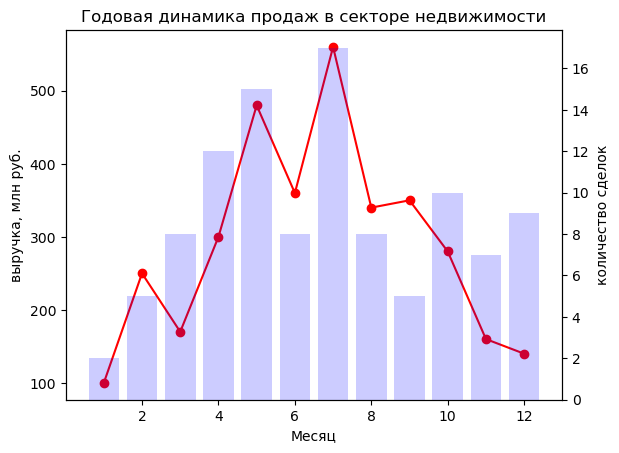

In [45]:
fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(df['month'], df['revenue'], color = 'r', marker = 'o', lw = 1.5 )
ax2.bar(df['month'], df['orders'], color = 'b', alpha = 0.2) # alpha - уровень прозрачности (от 0 до 1)

ax2.set_title('Годовая динамика продаж в секторе недвижимости')
ax.set_xlabel('Месяц')
ax.set_ylabel('выручка, млн руб.')
ax2.set_ylabel('количество сделок')

plt.show()

# Task 2

Построй график, на котором 2 линии будут отображать количество выпущенных фильмов и сериалов по годам, начиная с 2000 года. Предварительно преобразуй столбец с годом выпуска в строку. Подпиши оси и название графика. отобрази легенду.

In [2]:
data = pd.read_csv('../datasets/netflix_titles.csv')

In [3]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [4]:
data_2000 = data[data.release_year >= 2000]
data_2000['release_year'].astype(str)
data_2000.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [5]:
movies = data_2000[data_2000.type == 'Movie']
tv_shows = data_2000[data_2000.type == 'TV Show']
movies_cnt = movies.groupby('release_year')['type'].count().reset_index()
tv_shows_cnt = tv_shows.groupby('release_year')['type'].count().reset_index()
movies_cnt.head(2)

,release_year,type
0,2000,33
1,2001,40


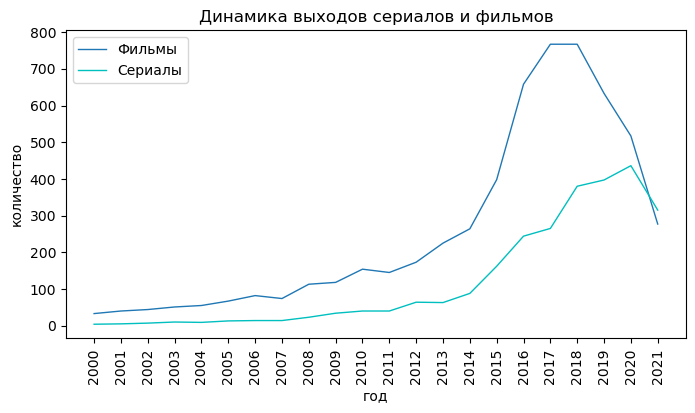

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(movies_cnt.release_year, movies_cnt.type, label = 'Фильмы', lw = 1 )
ax.plot(tv_shows_cnt.release_year, tv_shows_cnt.type, label = 'Сериалы', color = 'c', lw = 1 )

ax.set_title('Динамика выходов сериалов и фильмов')
ax.set_xlabel('год')
ax.set_ylabel('количество')
plt.legend()
plt.xticks(movies_cnt.release_year)
plt.xticks(rotation=90)

plt.show()

# Task 3

Используя метод fill_between(), закрась пространство под графиками из задания 2 до оси X в цвет линии графика и прозрачностью 0.1. В результате должно получиться 2 области, которые перекрывают друг друга.

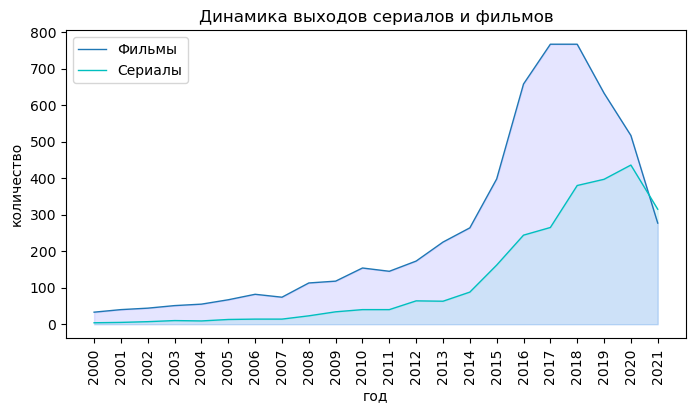

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(movies_cnt.release_year, movies_cnt.type, label = 'Фильмы', lw = 1 )
plt.fill_between(movies_cnt.release_year, movies_cnt.type, color='blue', alpha= .1)
ax.plot(tv_shows_cnt.release_year, tv_shows_cnt.type, label = 'Сериалы', color = 'c', lw = 1 )
plt.fill_between(tv_shows_cnt.release_year, tv_shows_cnt.type, color='c', alpha= .1)

ax.set_title('Динамика выходов сериалов и фильмов')
ax.set_xlabel('год')
ax.set_ylabel('количество')
plt.legend()
plt.xticks(movies_cnt.release_year)
plt.xticks(rotation=90)

plt.show()

# Task 4

Измени график: 

- отсортируй стоблцы по возврастанию;
- раскрась столбцы по возрастанию при помощи matplotlib.colormaps 'hsv', используй для кодирования цветов значения df["counts"];
- смести подписи значений столбцов в центр столбца и замени цвет шрифта на белый (не забудь изменить verticalalignment, чтобы подписи были точно по центру).

In [2]:
df_raw = pd.read_csv("../datasets/project12_auto.csv")
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [3]:
df = df_raw.groupby('manufacturer').size().reset_index(name = 'counts')

,manufacturer,counts
0,audi,18
1,chevrolet,19
2,dodge,37
3,ford,25
4,honda,9
5,hyundai,14
6,jeep,8
7,land rover,4
8,lincoln,3
9,mercury,4


In [4]:
df = df.sort_values('counts')

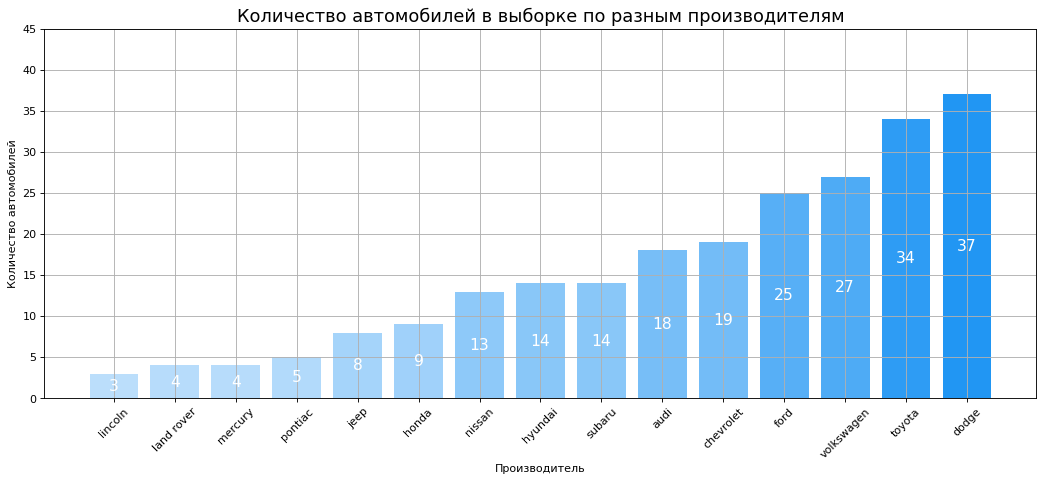

In [24]:
from matplotlib import cm 
colours = ["#bbdefb", "#2196f3"]

plt.figure(figsize=(16,6), dpi= 80)
plt.bar(df['manufacturer'], df["counts"])

max_df = df['counts'].max()
min_df = df['counts'].min()

for i, val in enumerate(df['counts'].values):
    plt.text(i, 0.5 * val, int(val), 
             ha ='center', va = 'center', fontsize = 14, color = 'w')

cmap = cm.colors.LinearSegmentedColormap.from_list('color_map', colours, N=256)
norm = cm.colors.Normalize(min_df, max_df) 

plt.bar(df['manufacturer'], df['counts'], color=cmap(norm(df['counts'])))
    
plt.title("Количество автомобилей в выборке по разным производителям", fontsize=16)
plt.ylabel('Количество автомобилей')
plt.xlabel('Производитель')
plt.xticks(rotation = 45)
plt.ylim(0, 45)
plt.grid()
plt.show()

# Дополнительное задание

Выбери фильмы и сериалы какого-нибудь из жанров в датасете netflix_titles.csv и построй облако тегов на основе их описаний.

Для этого задания дополнительно понадобится установить библиотеки wordcloud и stop_words.

In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
data = pd.read_csv('../datasets/netflix_titles.csv')
data = data[data.listed_in.str.contains('Dramas')]
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [4]:
text = " ".join(data.description)

In [5]:
stopwords = set(STOPWORDS)

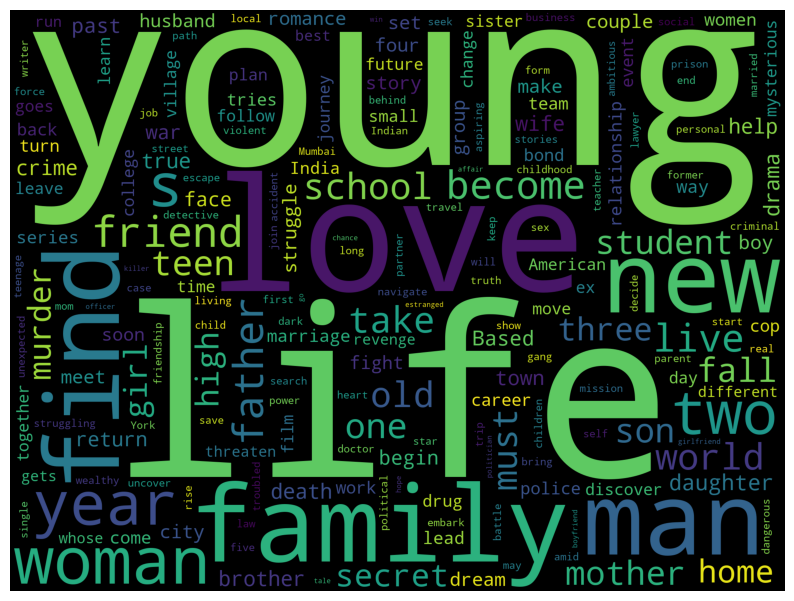

In [19]:
plt.figure(figsize=(10, 10))

wordcloud = WordCloud(width = 2000, 
                      height = 1500, 
                      background_color='black', 
                      margin=20, 
                      collocations=False, 
                      normalize_plurals= True,
                      stopwords = stopwords).generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()